# Kaggle fake news dataset
https://www.kaggle.com/competitions/fake-news/data?select=train.csv

# & Compiled dataset

Imports

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Load + merge dataset & clean 'NaN'

In [ ]:
true_general_df = pd.read_csv('true_general.csv', encoding='utf-8', error_bad_lines = False, engine="python")
true_general_df['label'] = 1
true_worldnews_df = pd.read_csv('true_worldnews.csv', encoding='utf-8', error_bad_lines = False, engine="python")
true_worldnews_df['label'] = 1
true_with_source2_df = pd.read_csv('true_with_source 2.csv', encoding = 'utf-8', error_bad_lines = False, engine="python")
true_with_source2_df.drop(['publish_time', 'feed_code', 'source_url'], axis=1, inplace=True)
true_with_source2_df.rename(columns={'index': 'id', 'headline_text': 'title'}, inplace=True)
true_with_source2_df['label'] = 1
true_politics_df = pd.read_csv('true_politics.csv', encoding='utf-8', error_bad_lines = False, engine="python")
true_politics_df['label'] = 1
true_business_df = pd.read_csv('true_business.csv', encoding='utf-8', error_bad_lines = False, engine="python")
true_business_df.drop(['date'], axis=1, inplace=True)
true_business_df['label'] = 1

<ipython-input-40-fa8eb983afcb>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  true_general_df = pd.read_csv('true_general.csv', encoding='utf-8', error_bad_lines = False, engine="python")
<ipython-input-40-fa8eb983afcb>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  true_worldnews_df = pd.read_csv('true_worldnews.csv', encoding='utf-8', error_bad_lines = False, engine="python")
<ipython-input-40-fa8eb983afcb>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  true_with_source2_df = pd.read_csv('true_with_source 2.csv', encoding = 'utf-8', error_bad_lines = False, engine="python")
<ipython-input-40-fa8eb983afcb>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a f

In [ ]:
fake_general_df = pd.read_csv('fake_General.csv', encoding='utf-8', error_bad_lines = False, engine="python")
fake_general_df['label'] = 0
fake_general2_df = pd.read_csv('fake_General_2.csv', encoding='utf-8', error_bad_lines = False, engine="python")
fake_general2_df['label'] = 0
fake_USnews_df = pd.read_csv('fake_USnews.csv', encoding='utf-8', error_bad_lines = False, engine="python")
fake_USnews_df['label'] = 0
combined_fake_df = pd.read_csv('combined_fake_news.csv', encoding='utf-8', error_bad_lines = False, engine="python")
combined_fake_df.drop(['URL'], axis=1, inplace=True)
combined_fake_df.rename(columns={'Title': 'title', 'Author': 'author', 'Body': 'text'}, inplace=True)
combined_fake_df['label'] = 0
combined_fake_df['author'] = ''
fake_government_df = pd.read_csv('fake_Government.csv', encoding='utf-8', error_bad_lines = False, engine="python")
fake_government_df['label'] = 0
fake_conspiracy_df = pd.read_csv('fake_Conspiracy.csv', encoding='utf-8', error_bad_lines = False, engine="python")
fake_conspiracy_df['label'] = 0
fake_conspiracy_df.drop(['published', 'language', 'site_url'], axis=1, inplace=True)
fake_middleeast_df = pd.read_csv('fake_MiddleEast.csv', encoding='utf-8', error_bad_lines = False, engine="python")
fake_middleeast_df.drop(['date'], axis=1, inplace=True)
fake_middleeast_df['label'] = 0
fake_politics_df = pd.read_csv('fake_politics.csv', encoding='utf-8', error_bad_lines = False, engine="python")
fake_politics_df['label'] = 0

<ipython-input-81-104e7518af08>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fake_general_df = pd.read_csv('fake_General.csv', encoding='utf-8', error_bad_lines = False, engine="python")
<ipython-input-81-104e7518af08>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fake_general2_df = pd.read_csv('fake_General_2.csv', encoding='utf-8', error_bad_lines = False, engine="python")
Skipping line 6770: field larger than field limit (131072)
Skipping line 9907: field larger than field limit (131072)
Skipping line 9906: Expected 6 fields in line 9906, saw 7
Skipping line 9907: Expected 6 fields in line 9907, saw 10
Skipping line 9909: Expected 6 fields in line 9909, saw 14
Skipping line 9911: Expected 6 fields in line 9911, saw 8
Skipping line 9913: Expected 6 fields in line 9913, saw 7
Skipping line 9

In [ ]:
general_df = pd.concat([true_politics_df, true_business_df, fake_politics_df, true_general_df, true_worldnews_df, true_with_source2_df, fake_general_df, fake_general2_df, fake_USnews_df, combined_fake_df, fake_government_df, fake_conspiracy_df, fake_middleeast_df], ignore_index=True)
general_df.drop(['Unnamed: 0', 'id', 'subject', 'date', 'type'], axis=1, inplace=True)
general_df.fillna('', inplace=True)
general_df

,title,text,label,author
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,
...,...,...,...,...
186034,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0,
186035,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0,
186036,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0,
186037,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0,


In [ ]:
general_df.to_csv

<bound method NDFrame.to_csv of                                                      title  \
0        FLYNN: Hillary Clinton, Big Woman on Campus - ...   
1        Jackie Mason: Hollywood Would Love Trump if He...   
2        Benoît Hamon Wins French Socialist Party’s Pre...   
3        Excerpts From a Draft Script for Donald Trump’...   
4        A Back-Channel Plan for Ukraine and Russia, Co...   
...                                                    ...   
1327431  McPain: John McCain Furious That Iran Treated ...   
1327432  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
1327433  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
1327434  How to Blow $700 Million: Al Jazeera America F...   
1327435  10 U.S. Navy Sailors Held by Iranian Military ...   

                               author  \
0                     Daniel J. Flynn   
1                     Daniel Nussbaum   
2                     Alissa J. Rubin   
3                                       
4        Megan Two

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
general_df.to_csv('general_df.csv')
!cp general_df.csv "drive/My Drive/"

Or directly load general_df after downloading the merged file previously

In [ ]:
general_df = pd.read_csv('general_df.csv', encoding='utf-8', error_bad_lines = False, engine="python")

<ipython-input-21-900b7cf123bf>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  general_df = pd.read_csv('general_df.csv', encoding='utf-8', error_bad_lines = False, engine="python")


In [ ]:
print(len(general_df))

186039


Loading some test datasets - real-time FT & Reuters articles, Kaggle fake news dataset

In [ ]:
reuters_df = pd.read_csv('reuters_sectioned.csv', encoding='utf-8', error_bad_lines = False, engine="python")
reuters_df = reuters_df[['Title', 'Body']]
reuters_df.rename(columns={'Title': 'title', 'Body': 'text'}, inplace=True)
reuters_df['label'] = 1
reuters_df['author'] = ''
reuters_df.fillna('', inplace=True)
reuters_df

<ipython-input-22-d82dc98741c3>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  reuters_df = pd.read_csv('reuters_sectioned.csv', encoding='utf-8', error_bad_lines = False, engine="python")


FileNotFoundError: ignored

In [ ]:
ft3_df = pd.read_csv('financial_times_sectioned_3mo.csv', encoding='utf-8', error_bad_lines = False, engine="python")
ft3_df = ft3_df[['Title', 'Caption']]
ft3_df.rename(columns={'Title': 'title', 'Caption': 'text'}, inplace=True)
ft3_df['label'] = 1
ft3_df['author'] = ''
ft3_df.fillna('', inplace=True)
ft3_df

<ipython-input-9-15d36b5ca0b3>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ft3_df = pd.read_csv('financial_times_sectioned_3mo.csv', encoding='utf-8', error_bad_lines = False, engine="python")


,title,text,label,author
0,Small aid convoy reaches Gaza after Hamas rele...,Trucks carrying medicines and tinned food cros...,1,
1,Brazil is taking worrying steps away from clea...,Allowing political parties to buy boats and pl...,1,
2,UK Treasury set for £100mn windfall from natio...,Government took over Bradford & Bingley and No...,1,
3,Britain’s proposed regulation of Big Tech must...,Jason Furman and others write to Sunak in push...,1,
4,Dismantling illiberalism in Poland Premium con...,A new government will have its work cut out to...,1,
...,...,...,...,...
10339,Why productivity is so weak at UK companies,Longstanding problems of low investment and sk...,1,
10340,"Designer Barbies, lost noses and Viking vessel...",Discover the Danish capital’s trove of spaces ...,1,
10341,It’s getting to a point where a business can’t...,An FT column offering a behind-the-scenes look...,1,
10342,Women in football fail to score top jobs off t...,Female tournaments are generating record inter...,1,


In [ ]:
train_df = pd.read_csv('train.csv', encoding='utf-8', error_bad_lines = False, engine="python")
train_df.drop(['id'], axis=1, inplace=True)
train_df.dropna(subset=['label'], inplace=True)
train_df.fillna('', inplace=True)
train_df['label'] = train_df['label'].astype(int)
train_df

<ipython-input-10-6d80bdfa53ed>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_df = pd.read_csv('train.csv', encoding='utf-8', error_bad_lines = False, engine="python")
Skipping line 1496: unexpected end of data


,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
1489,"At the Mosul Front: Traps, Smoke Screens and S...",Bryan Denton and Michael R. Gordon,"Mr. Denton, a Times photographer, and Mr. Gord...",0
1490,Gay Catholic Groups Want Pope Francis to Do Mo...,Jim Yardley,ROME — Leaders of gay Catholic groups on Mo...,0
1491,"Fake News: USDA, Journos Blame Breitbart for F...",Jerome Hudson,"In another example of “fake news,” several j...",0
1492,Re: What security threat? Huma Abedin doesn’t ...,Eric Botena,"— Don't Panic (@dd42bb) October 30, 2016 @matt...",1


## Data cleaning

1. Remove URLs

In [ ]:
general_df = pd.read_csv("/content/drive/MyDrive/Seachain/general_df.csv", index_col=0, encoding='utf-8', error_bad_lines = False, engine="python")
general_df.fillna("", inplace=True)
general_df

<ipython-input-7-424bb5e09dbb>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  general_df = pd.read_csv("/content/drive/MyDrive/Seachain/general_df.csv", index_col=0, encoding='utf-8', error_bad_lines = False, engine="python")


FileNotFoundError: ignored

In [ ]:
columns = ['title', 'author', 'text']
dfs = [general_df]

def apply_function(col_list, df_list, fx):
  for i in col_list:
    for j in df_list:
      j[i] = j[i].apply(fx)

In [ ]:
def cleaning_URLs(data):
    return re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)', ' ', data)

In [ ]:
apply_function(columns, dfs, cleaning_URLs)

2. Convert to lowercase, remove puncutations & repeating characters



In [ ]:
punctuation_to_remove = [',','!', '"', "'", '#', '$', '%', '&', '(', ')', '.', '/', ':', ';', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '+', '—', '*', '<', '>', '-']
custom_translation = str.maketrans('', '', ''.join(punctuation_to_remove))

def clean1(text):
  if isinstance(text, str):
    text = text.lower()
    text = text.replace('"', '')
    text = text.replace("'", '')
    return text.translate(custom_translation)
  return text

def cleaning_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

In [ ]:
apply_function(columns, dfs, clean1)
apply_function(columns, dfs, cleaning_repeating_char)

In [ ]:
general_df.head()

,title,author,text,label
0,flynn hillary clinton big woman on campus bre...,daniel j flynn,ever get the feeling your life circles the rou...,1
1,jackie mason hollywood would love trump if he ...,daniel nussbaum,in these trying times jackie mason is the voic...,1
2,benoît hamon wins french socialist party’s pre...,alissa j rubin,paris france chose an idealistic traditional c...,1
3,excerpts from a draft script for donald trump’...,,donald j trump is scheduled to make a highly a...,1
4,a backchannel plan for ukraine and russia cour...,megan twohey and scott shane,a week before michael t flynn resigned as nati...,1


3. Remove stopwords

In [ ]:
stopword_list=nltk.corpus.stopwords.words('english')
stop = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([i for i in str(text).split(" ") if i not in stop])

In [ ]:
apply_function(columns, dfs, remove_stopwords)

In [ ]:
general_df.head()

,title,author,text,label
0,flynn hillary clinton big woman campus breitbart,daniel j flynn,ever get feeling life circles roundabout rathe...,1
1,jackie mason hollywood would love trump bombed...,daniel nussbaum,trying times jackie mason voice reason week’s ...,1
2,benoît hamon wins french socialist party’s pre...,alissa j rubin,paris france chose idealistic traditional cand...,1
3,excerpts draft script donald trump’s qampa bla...,,donald j trump scheduled make highly anticipat...,1
4,backchannel plan ukraine russia courtesy trump...,megan twohey scott shane,week michael flynn resigned national security ...,1


4. Lemmatization

In [ ]:
lm = nltk.WordNetLemmatizer()

def lemmatization(data):
    if isinstance(data, str):
      text = [lm.lemmatize(word) for word in data.split()]
      return ' ' .join(text)
    return data

In [ ]:
apply_function(columns, dfs, lemmatization)

In [ ]:
general_df.head()

5. Function to clean any new dataset at a go

In [ ]:
all_clean_fx = [cleaning_URLs, clean1, cleaning_repeating_char, remove_stopwords, lemmatization]
df_list = [general_df, ft3_df, reuters_df, train_df]

In [ ]:
def clean_all(df_list, cols):
  for i in all_clean_fx:
    apply_function(cols, df_list, i)

In [ ]:
clean_all(df_list, columns) #columns defined at the start

In [ ]:
general_df

,Unnamed: 0.1,Unnamed: 0,title,author,text,label
0,0,0,flynn hillary clinton big woman campus breitbart,daniel j flynn,ever get feeling life circle roundabout rather...,1
1,1,1,jackie mason hollywood would love trump bombed...,daniel nussbaum,trying time jackie mason voice reason week’s e...,1
2,2,2,benoît hamon win french socialist party’s pres...,alissa j rubin,paris france chose idealistic traditional cand...,1
3,3,3,excerpt draft script donald trump’s qampa blac...,nan,donald j trump scheduled make highly anticipat...,1
4,4,4,backchannel plan ukraine russia courtesy trump...,megan twohey scott shane,week michael flynn resigned national security ...,1
...,...,...,...,...,...,...
379,379,565,georgia candidate jon ossoff’s film firm finan...,aaron klein,democrat jon ossoff candidate fell short mark ...,1
380,380,566,effort defeat isi u iran impede one another ne...,tim arango,baghdad iraqi force backed american airstrikes...,1
381,381,567,rick ‘put bullet trump’ wilson potus supporter...,tony lee,gop establishment consultant rick wilson one v...,1
382,382,568,trump tell planned parenthood funding stay abo...,maggie haberman,white house concerned possible political reper...,1


In [ ]:
reuters_df

,title,text,label,author
0,blackrock file spot ethereum etf crypto push,nov 16 reuters asset management giant blackroc...,1,
1,amplify roll first sofrbased etf income seeker,nov 15 reuters amplify investment teamed asset...,1,
2,chinalinked etf draw bullish option bet ahead ...,new york nov 15 reuters uslisted exchange trad...,1,
3,investor thematic fund hurt return trading fre...,nov 15 reuters investor thematic fund cut retu...,1,
4,burry famous big short place bearish bet semic...,new york nov 14 reuters hedge fund manager mic...,1,
...,...,...,...,...
2132,fed powell say higher rate need persist affect...,new york nov 1 reuters federal reserve chairma...,1,
2133,u job opening stay elevated layoff ninemonth low,washington nov 1 reuters u job opening increas...,1,
2134,u construction spending rise september,washington nov 1 reuters u construction spendi...,1,
2135,u job opening remain elevated september,washington nov 1 reuters u job opening increas...,1,


In [ ]:
ft3_df

,title,text,label,author
0,small aid convoy reach gaza hamas release two ...,truck carrying medicine tinned food cross egyp...,1,
1,brazil taking worrying step away clean politics,allowing political party buy boat plane public...,1,
2,uk treasury set £100mn windfall nationalised b...,government took bradford bingley northern rock...,1,
3,britain’s proposed regulation big tech must we...,jason furman others write sunak push fend indu...,1,
4,dismantling illiberalism poland premium content,new government work cut roll back rightwing na...,1,
...,...,...,...,...
10339,productivity weak uk company,longstanding problem low investment skill gap ...,1,
10340,designer barbies lost nose viking vessel copen...,discover danish capital’s trove space dedicate...,1,
10341,it’s getting point business can’t even greenwa...,ft column offering behindthescenes look work r...,1,
10342,woman football fail score top job pitch,female tournament generating record interest s...,1,


In [ ]:
train_df

,title,author,text,label
0,house dem aide didn’t even see comey’s letter ...,darrell lucus,house dem aide didn’t even see comey’s letter ...,1
1,flynn hillary clinton big woman campus breitbart,daniel j flynn,ever get feeling life circle roundabout rather...,0
2,truth might get fired,c,truth might get fired october 29 2016 the tens...,1
3,15 civilian killed single u airstrike identified,jessica purkiss,video 15 civilian killed single u airstrike id...,1
4,iranian woman jailed fictional unpublished sto...,howard portnoy,print an iranian woman sentenced six year pris...,1
...,...,...,...,...
17455,nyt’s friedman flynn resignation show russia h...,pam key,tuesday msnbc’s “morning joe” new york time co...,0
17456,tmz milo ’sorry hater plan stay us’ breitbart,breitbart tech,tmz report former breitbart senior editor milo...,0
17457,theresa may national threat level remains seve...,kristina wong,united kingdom prime minister theresa may said...,0
17458,waiting result opinion conservative,,news compare contrast new jersey florida votin...,1


## Multinomial Naive Bayes

Imports

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack
from sklearn.metrics import roc_curve, auc

1. Count vectorization

In [ ]:
max_features = 20000
min_df = 2
max_df = 0.8

General - author, title, text

In [ ]:
general_df_nb = general_df.copy()
general_df_nb['ATT'] = general_df[columns].apply(lambda row: ' '.join(row), axis=1)

In [ ]:
vectorizers1 = CountVectorizer(max_features=max_features, min_df=min_df, max_df=max_df)
X1 = vectorizers1.fit_transform(general_df_nb['ATT'])

In [ ]:
np.shape(X1)

(1327436, 20000)

General - title, text

In [ ]:
polcols = ['title', 'text']

In [ ]:
general_df_nb['TT'] = general_df[polcols].apply(lambda row: ' '.join(row), axis=1)

In [ ]:
vectorizers2 = CountVectorizer(max_features=max_features, min_df=min_df, max_df=max_df)
X2 = vectorizers2.fit_transform(general_df_nb['TT'])

In [ ]:
np.shape(X2)

(1327436, 20000)

Reuters & FT - title, text

In [ ]:
reuters_df_nb = reuters_df.copy()
reuters_df_nb['TT'] = reuters_df[polcols].apply(lambda row: ' '.join(row), axis=1)

In [ ]:
vectorizers3 = CountVectorizer(max_features=max_features, max_df=max_df)
X3 = vectorizers3.fit_transform(reuters_df_nb['TT'])

In [ ]:
np.shape(X3)

(2137, 20000)

In [ ]:
ft3_df_nb = ft3_df.copy()
ft3_df_nb['TT'] = ft3_df[polcols].apply(lambda row: ' '.join(row), axis=1)

In [ ]:
vectorizers4 = CountVectorizer(max_features=15000, max_df = max_df) #no min_df here because X4 won't be 15000 otherwise
X4 = vectorizers4.fit_transform(ft3_df_nb['TT'])

In [ ]:
np.shape(X4)

(10344, 15000)

train_df - author, title, text

In [ ]:
train_df_nb = train_df.copy()
train_df_nb['ATT'] = train_df[columns].apply(lambda row: ' '.join(row), axis=1)

In [ ]:
vectorizers6 = CountVectorizer(max_features=max_features, min_df=min_df, max_df=max_df)
X6 = vectorizers6.fit_transform(train_df_nb['ATT'])

In [ ]:
np.shape(X6)

(1494, 20000)

train_df - title, text

In [ ]:
train_df_nb['TT'] = train_df[polcols].apply(lambda row: ' '.join(row), axis=1)
vectorizers7 = CountVectorizer(max_features=max_features, min_df=min_df, max_df=max_df)
X7 = vectorizers7.fit_transform(train_df_nb['TT'])

In [ ]:
np.shape(X7)

(1494, 20000)

Merge reuters, FT & train_df - title, text

In [ ]:
reuters_ft3_df_nb = pd.concat([reuters_df_nb, ft3_df_nb, train_df_nb], ignore_index=True)
vectorizers5 = CountVectorizer(max_features=max_features, min_df=min_df, max_df=max_df)
X5 = vectorizers5.fit_transform(reuters_ft3_df_nb['TT'])

In [ ]:
np.shape(X5)

(13975, 20000)

In [ ]:
reuters_ft3_df_nb.to_csv('reuters_ft3_df_nb.csv')

2. Model creation

Model trained on general (author, title, text)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, general_df['label'], test_size=0.2, random_state=42)
clf1 = MultinomialNB()
clf1.fit(X_train1, y_train1)

MultinomialNB()

Model trained on general (title, text)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, general_df['label'], test_size=0.2, random_state=42)
clf2 = MultinomialNB()
clf2.fit(X_train2, y_train2)

MultinomialNB()

In [ ]:
y_pred2 = clf2.predict(X_test2) #predict general TT test set with general TT model
y_pred1 = clf1.predict(X_test1) #predict general ATT test set with general ATT model

In [ ]:
y_pred_ft1 = clf1.predict(X4) #predict FT3 with general ATT model
y_pred_ft2 = clf2.predict(X4) #predict FT3 with general TT model

In [ ]:
y_pred_r1 = clf1.predict(X3) #predict reuters with general ATT model
y_pred_r2 = clf2.predict(X3) #predict reuters with general TT model

In [ ]:
y_pred_train1 = clf1.predict(X6) #predict train with general ATT model
y_pred_train2 = clf2.predict(X7) #predict train with general TT model

In [ ]:
y_pred_ftr2 = clf2.predict(X5) #predict train,ft&reuters combined with general TT model

3. Model evaluation

handle out of vocabulary words - with dictionaries/plug-ins like Word2Vec

In [ ]:
accuracy = accuracy_score(reuters_ft3_df_nb['label'], y_pred_ftr2)
report = classification_report(reuters_ft3_df_nb['label'], y_pred_ftr2)
print('Predicting combined with general ATT model')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Predicting combined with general ATT model
Accuracy: 0.6761359570661897
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.27      0.08       745
           1       0.94      0.70      0.80     13230

    accuracy                           0.68     13975
   macro avg       0.50      0.48      0.44     13975
weighted avg       0.90      0.68      0.76     13975



In [ ]:
accuracy = accuracy_score(train_df['label'], y_pred_train1)
report = classification_report(train_df['label'], y_pred_train1)
print('Predicting train with general ATT model')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Predicting train with general ATT model
Accuracy: 0.4605087014725569
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.21      0.28       745
           1       0.47      0.71      0.57       749

    accuracy                           0.46      1494
   macro avg       0.45      0.46      0.42      1494
weighted avg       0.45      0.46      0.42      1494



In [ ]:
accuracy = accuracy_score(train_df['label'], y_pred_train2)
report = classification_report(train_df['label'], y_pred_train2)
print('Predicting train with general ATT model')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Predicting train with general ATT model
Accuracy: 0.5649263721552878
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.52      0.54       745
           1       0.56      0.61      0.58       749

    accuracy                           0.56      1494
   macro avg       0.57      0.56      0.56      1494
weighted avg       0.57      0.56      0.56      1494



In [ ]:
accuracy = accuracy_score(ft3_df['label'], y_pred_ft1)
report = classification_report(ft3_df['label'], y_pred_ft1)
print('Predicting FT3 with general ATT model')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Predicting FT3 with general ATT model
Accuracy: 0.649168600154679
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.65      0.79     10344

    accuracy                           0.65     10344
   macro avg       0.50      0.32      0.39     10344
weighted avg       1.00      0.65      0.79     10344



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy = accuracy_score(ft3_df['label'], y_pred_ft2)
report = classification_report(ft3_df['label'], y_pred_ft2)
print('Predicting FT3 with general TT model')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Predicting FT3 with general TT model
Accuracy: 0.7703982985305491
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.77      0.87     10344

    accuracy                           0.77     10344
   macro avg       0.50      0.39      0.44     10344
weighted avg       1.00      0.77      0.87     10344



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy = accuracy_score(reuters_df['label'], y_pred_r1)
report = classification_report(reuters_df['label'], y_pred_r1)
print('Predicting reuters with general ATT model')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Predicting reuters with general ATT model
Accuracy: 0.7510528778661675
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86      2137

    accuracy                           0.75      2137
   macro avg       0.50      0.38      0.43      2137
weighted avg       1.00      0.75      0.86      2137



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy = accuracy_score(reuters_df['label'], y_pred_r2)
report = classification_report(reuters_df['label'], y_pred_r2)
print('Predicting reuters with general TT model')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Predicting reuters with general TT model
Accuracy: 0.8006551240056153
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89      2137

    accuracy                           0.80      2137
   macro avg       0.50      0.40      0.44      2137
weighted avg       1.00      0.80      0.89      2137



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy = accuracy_score(y_test1, y_pred1)
report = classification_report(y_test1, y_pred1)
print('General - author, title, text')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

General - author, title, text
Accuracy: 0.9052085572995054
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77      6444
           1       0.98      0.91      0.94     30764

    accuracy                           0.91     37208
   macro avg       0.82      0.90      0.85     37208
weighted avg       0.92      0.91      0.91     37208



In [ ]:
accuracy = accuracy_score(y_test2, y_pred2)
report = classification_report(y_test2, y_pred2)
print('General - title, text')
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

General - title, text
Accuracy: 0.9041603956138465
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76      6444
           1       0.98      0.91      0.94     30764

    accuracy                           0.90     37208
   macro avg       0.82      0.90      0.85     37208
weighted avg       0.92      0.90      0.91     37208



ROC curve

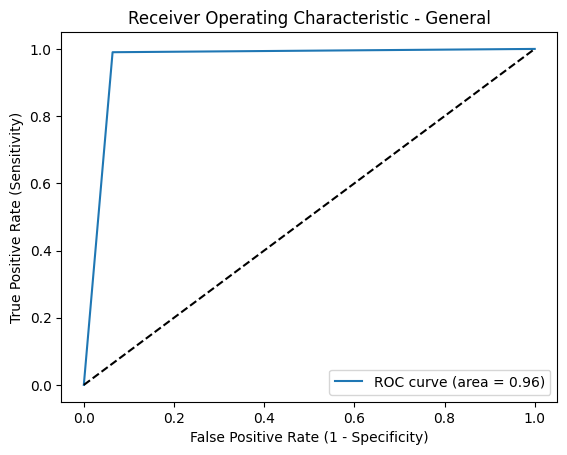

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic - General')
plt.legend(loc="lower right")

plt.show()

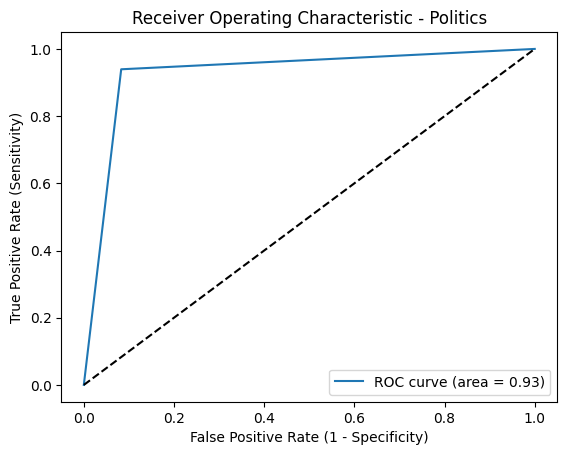

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic - Politics')
plt.legend(loc="lower right")

plt.show()

## Deep learning - LSTM

Imports

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Dense, Activation, Dropout, Input
from keras.optimizers import Adam, RMSprop
from keras.utils import pad_sequences, plot_model

ImportError: ignored

1. Tokenize data

In [ ]:
#Model constants
MAX_LEN = 3000
MAX_FEATURES = 500

In [ ]:
subset = general_df.sample(frac=0.5, random_state=42)

In [ ]:
general_df2 = subset.copy()
general_df2['combined_text'] = subset['title'] + ' ' + subset['author'] + ' ' + subset['text']
X_LSTM = general_df2['combined_text']
y_LSTM = general_df2['label']


In [ ]:
tokenizer = Tokenizer(num_words = MAX_FEATURES)
tokenizer.fit_on_texts(X_LSTM)
X_seq = tokenizer.texts_to_sequences(X_LSTM)
X_padded = pad_sequences(X_seq, maxlen = MAX_LEN)

X_train_LSTM, X_test_LSTM, y_train_LSTM, y_test_LSTM = train_test_split(X_padded, y_LSTM, test_size=0.2, random_state=42)

AttributeError: ignored

In [ ]:
print(X_train_LSTM.shape, X_test_LSTM.shape, y_train_LSTM.shape, y_test_LSTM.shape)

In [ ]:
reuters_ft3_df_lstm = reuters_ft3_df_nb.copy()
reuters_ft3_df_lstm['combined_text'] = reuters_ft3_df_nb['title'] + ' ' + reuters_ft3_df_nb['author'] + ' ' + reuters_ft3_df_nb['text']
Xt_LSTM = reuters_ft3_df_lstm['combined_text']
yt_LSTM = reuters_ft3_df_lstm['label']

NameError: ignored

In [ ]:
tokenizer.fit_on_texts(Xt_LSTM)
Xt_seq = tokenizer.texts_to_sequences(Xt_LSTM)
Xt_padded = pad_sequences(Xt_seq, maxlen = MAX_LEN)

In [ ]:
print(Xt_padded.shape)

(13975, 3000)


2. Model creation

In [ ]:
## Model Constants
BATCH_SIZE = 64
EPOCHS = 6

In [ ]:
# Input Layer
inputs = Input(shape = [MAX_LEN])

# Embedding Layer - Converts the input sequence into a sequence of dense vectors
layer = Embedding(MAX_FEATURES, 50, input_length = MAX_LEN)(inputs)

# LSTM Layer
layer = LSTM(64)(layer)

# Dense Layer - Fully connected layer
layer = Dense(256)(layer)
layer = Activation('relu')(layer)

# Dropout Layer - Prevents overfitting
layer = Dropout(0.5)(layer)

# Output Layer
layer = Dense(1)(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs = inputs, outputs = layer)

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])
model.summary()

NameError: ignored

General ATT model - tested with combined test set





In [ ]:
# Train the model
history = model.fit(X_padded, y_LSTM, validation_data = (Xt_padded, yt_LSTM), batch_size = BATCH_SIZE, epochs = EPOCHS)
scores = model.evaluate(Xt_padded, yt_LSTM, verbose = 0)
print("General")
print("Accuracy: %.2f%%" % (scores[1] * 100))

NameError: ignored

3. Model evaluation

Confusion matrix

59/59 [==============================] - 23s 377ms/step


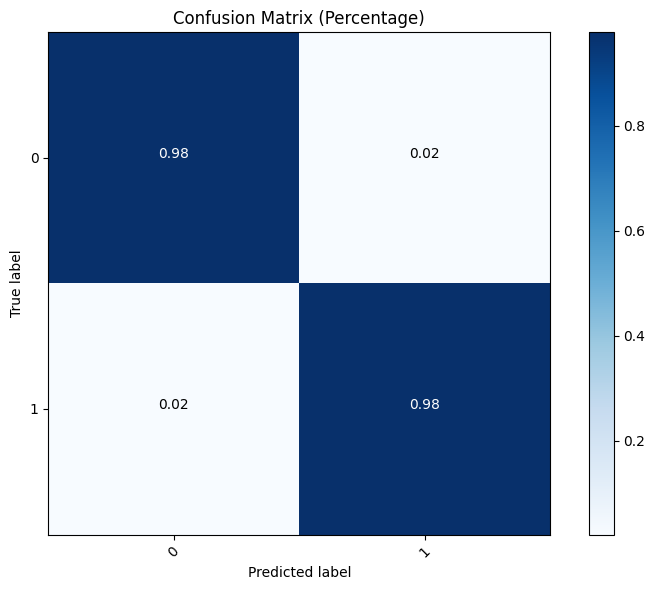

In [ ]:
y_pred = model.predict(X_test_LSTM)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test_LSTM, y_pred)

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Calculate percentages

    plt.imshow(cm_percentage, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix (Percentage)')
    plt.colorbar()

    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm_percentage[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm_percentage[i, j] > 0.5 else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

labels = [0, 1]
plot_confusion_matrix(cm, labels)
plt.show()


Other graphs

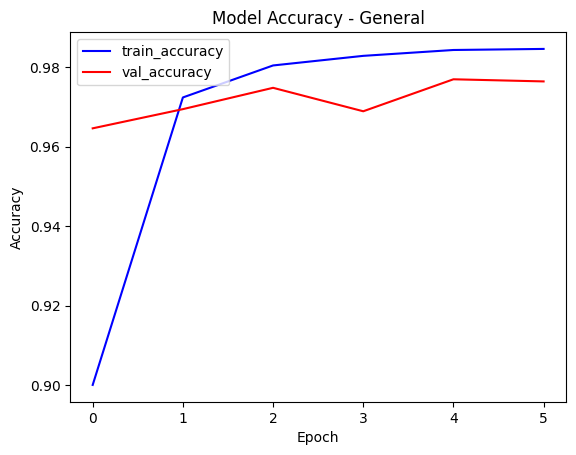

In [ ]:
# Plotting Model Accuracy
s, (at) = plt.subplots(1,1)
at.plot(history.history['accuracy'], c = 'b')
at.plot(history.history['val_accuracy'], c ='r')
at.set_title('Model Accuracy - General')
at.set_ylabel('Accuracy')
at.set_xlabel('Epoch')
at.legend(['train_accuracy', 'val_accuracy'], loc = 'upper left')
plt.show()

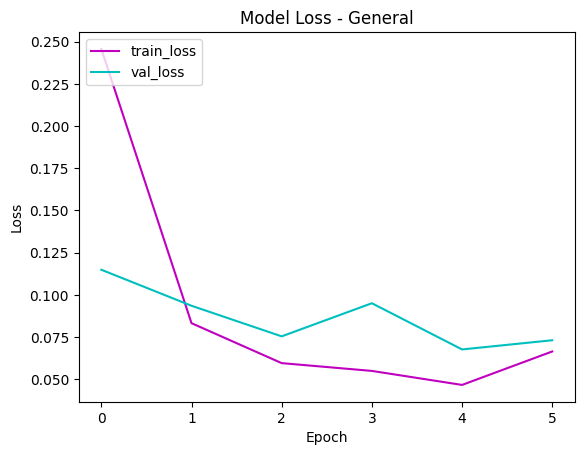

In [ ]:
# Plotting Model Loss
s, (al) = plt.subplots(1,1)
al.plot(history.history['loss'], c ='m')
al.plot(history.history['val_loss'], c ='c')
al.set_title('Model Loss - General')
al.set_ylabel('Loss')
al.set_xlabel('Epoch')
al.legend(['train_loss', 'val_loss'], loc = 'upper left')
plt.show()